#### This code generates the solution plots (figures 2 and 3 in the manuscript) and the data in the tables (tables 3 and 4 in the manuscript) for both initial conditions with three values of epsilon at two final time points. 

## choose a particular case here
#### Two cases: 'strong_cubic_foc_zero_phase' and 'strong_cubic_foc_nonzero_phase'


In [1]:
case = 'strong_cubic_foc_zero_phase'

In [2]:
#Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def position_density(u,N):  # n(x,t)
    V = u[:N]; W = u[N:]
    return V**2+W**2

def current_density(u,N):  # J(x,t)
    V = u[:N]; W = u[N:]
    return np.multiply(V[:-1],W[1:])-np.multiply(V[1:],W[:-1])


In [4]:
# ImEx time-stepping methods
method_names = ['ARK32','ARK43']; Stage = [4,6]; Order = [3,4]; em_Or = [2,3]; Sch_No = [3,4]
# Operator splitting methods
OS_method_names = ['Op_Sp1','Op_Sp2','Op_Sp4']; OS_Stage = [1,2,5]; OS_Order = [1,2,4]; OS_Sch_No = [0,1,2]
ImEx_idx1 = 1; OS_idx1 = 1; OS_idx2 = 2;

### Load numerical solution

In [5]:
if case == 'strong_cubic_foc_zero_phase':
    # Example 4.5: zero phase
    case_title = 'Strong Cubic Foc Zero Phase';
    xL = -8; xR =8; L = xR-xL; t0 = 0; inv = 1; N_ref = L*4096; dt_ref = 1e-4;
    Eps = np.array([0.2,0.2/2,0.2/4]); Ns = np.array([L*32,L*32*2,L*32*4]);
    Dts = np.array([0.01,0.01/4,0.01/40]); Ts = np.array([0.8,1.2])
    df = pd.read_csv("./RefSolData/%s_RefSol_N_%d_dt_%1.e_Data.csv"%(case,N_ref,dt_ref),index_col=[0])
    ref_sol = np.load("./RefSolData/%s_RefSol_N_%d_dt_%1.e.npy"%(case,N_ref,dt_ref), allow_pickle=True)
elif case == 'strong_cubic_foc_nonzero_phase':
    # Example 4.5: nonzero phase
    case_title = 'Strong Cubic Foc Nonero Phase';
    xL = -8; xR =8; L = xR-xL; t0 = 0; inv = 1; N_ref = L*4096; dt_ref = 1e-4;
    Eps = np.array([0.2,0.2/2,0.2/4]); Ns = np.array([L*32,L*32*2,L*32*4]);
    Dts = np.array([0.01,0.01/4,0.01/40]); Ts = np.array([0.5,0.9])
    df = pd.read_csv("./RefSolData/%s_RefSol_N_%d_dt_%1.e_Data.csv"%(case,N_ref,dt_ref),index_col=[0])
    ref_sol = np.load("./RefSolData/%s_RefSol_N_%d_dt_%1.e.npy"%(case,N_ref,dt_ref), allow_pickle=True)

In [6]:
# Numerical solution
St_foc_b_ARK43_Sol = np.load("./Data/%s_NumSol_B_ARK43.npy"%(case), allow_pickle=True)
St_foc_r_ARK43_Sol = np.load("./Data/%s_NumSol_R_ARK43.npy"%(case), allow_pickle=True)
St_foc_r_EC_ARK43_Sol = np.load("./Data/%s_NumSol_R_EC_ARK43.npy"%(case), allow_pickle=True)
St_foc_OpSp2_Sol = np.load("./Data/%s_NumSol_OpSp2.npy"%(case), allow_pickle=True)
St_foc_OpSp4_Sol = np.load("./Data/%s_NumSol_OpSp4.npy"%(case), allow_pickle=True)

# Runtime
St_foc_b_ARK43_Time = np.load("./Data/%s_RunTime_B_ARK43.npy"%(case), allow_pickle=True)
St_foc_r_ARK43_Time  = np.load("./Data/%s_RunTime_R_ARK43.npy"%(case), allow_pickle=True)
St_foc_r_EC_ARK43_Time  = np.load("./Data/%s_RunTime_R_EC_ARK43.npy"%(case), allow_pickle=True)
St_foc_OpSp2_Time  = np.load("./Data/%s_RunTime_OpSp2.npy"%(case), allow_pickle=True)
St_foc_OpSp4_Time  = np.load("./Data/%s_RunTime_OpSp4.npy"%(case), allow_pickle=True)

In [7]:
df

,Method,Domain,N_ref,dt_ref
0,Op_Sp4,"[-8,8]",65536,0.0001


In [8]:
N_ref = df['N_ref'][0]; dt_ref = df['dt_ref'][0];
x_ref = np.linspace(xL, xR, N_ref+1)[:-1] # exclude the right boundary point

In [9]:
import os
path = './Figures/'
if not os.path.exists(path):
   os.makedirs(path)

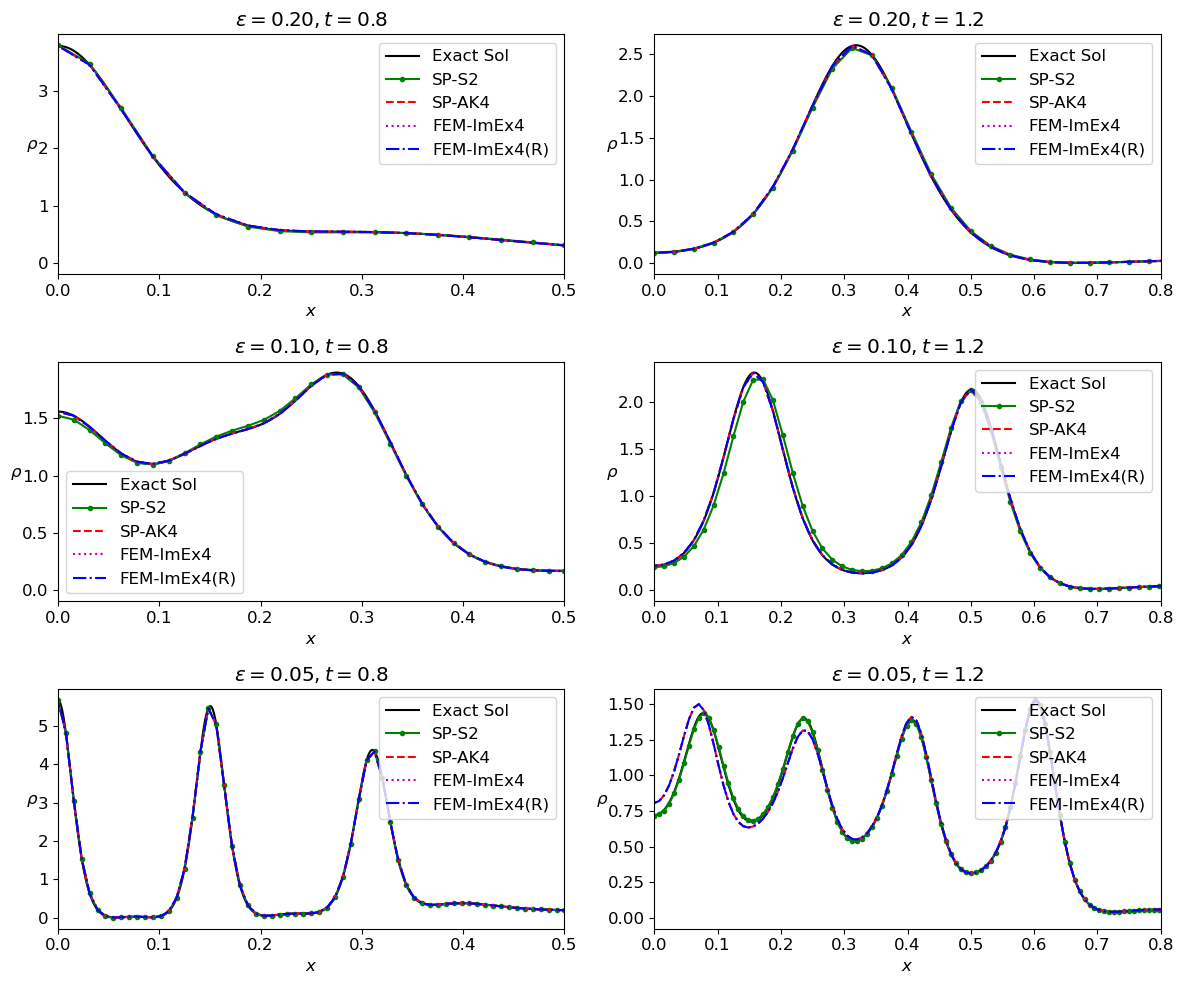

In [10]:
# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 12}
plt.rc('font', **font)

Errs = np.empty(shape=(3, 2), dtype='object')

fig = plt.subplots(3, 2, figsize=(12, 10))
for i in range(len(Eps)):
    ep = Eps[i]; N = Ns[i]; dt = Dts[i]; x = np.linspace(xL, xR, N+1)[:-1]
    skip = int(N_ref/Ns[i])
    for j in range(len(Ts)):
        T = Ts[j]
        plt.subplot(3, 2, 2*i+j+1)
        #plt.plot(x_ref[::skip],position_density(ref_sol[i,j][::skip],N),'-k',label="Exact Sol")
        plt.plot(x_ref,position_density(ref_sol[i,j],N_ref),'-k',label="Exact Sol")
        plt.plot(x,position_density(St_foc_OpSp2_Sol[i,j],N),'.-g',label="SP-S2")
        plt.plot(x,position_density(St_foc_OpSp4_Sol[i,j],N),'--r',label="SP-AK4")
        plt.plot(x,position_density(St_foc_b_ARK43_Sol[i,j],N),':m',label="FEM-ImEx4")
        plt.plot(x,position_density(St_foc_r_ARK43_Sol[i,j],N),'-.b',label="FEM-ImEx4(R)")
        plt.xlabel('$x$'); plt.ylabel(r"$\rho$",rotation=0)
        plt.title("$\epsilon = %1.2f, t = %1.1f$"%(ep,T))
        if case == 'strong_cubic_foc_zero_phase':
            if T == 0.8:
                plt.xlim(0,0.5)
            elif T == 1.2:
                plt.xlim(0,0.8)
        elif case == 'strong_cubic_foc_nonzero_phase':
            if T == 0.5:
                plt.xlim(0,0.5)
            elif T == 0.9:
                plt.xlim(0,0.8)
        plt.tight_layout()
        plt.legend()
        
plt.savefig('./Figures/%s_Sol_Comparison.pdf'%(case),format='pdf', bbox_inches="tight",transparent=True)

        
        

## Error calculation

In [11]:
Err_SP2 = np.empty(shape=(3, 2), dtype='object'); Err_SP4 = np.empty(shape=(3, 2), dtype='object')
Err_ARK43 = np.empty(shape=(3, 2), dtype='object'); Err_MRRK_ARK43 = np.empty(shape=(3, 2), dtype='object')
Err_MRRK_EC_ARK43 = np.empty(shape=(3, 2), dtype='object')

for i in range(len(Eps)):
    ep = Eps[i]; N = Ns[i]; dt = Dts[i];
    skip = int(N_ref/Ns[i])
    for j in range(len(Ts)):
        T = Ts[j]
        
        ref_sol_real = ref_sol[i,j][::skip][:Ns[i]]; ref_sol_imag = ref_sol[i,j][::skip][Ns[i]:]
        ref_sol_comp = ref_sol_real+1j*ref_sol_imag
        
        OpSp2_sol_comp = St_foc_OpSp2_Sol[i,j][:Ns[i]] + 1j*St_foc_OpSp2_Sol[i,j][Ns[i]:]
        OpSp4_sol_comp = St_foc_OpSp4_Sol[i,j][:Ns[i]] + 1j*St_foc_OpSp4_Sol[i,j][Ns[i]:]
        ARK43_sol_comp = St_foc_b_ARK43_Sol[i,j][:Ns[i]] + 1j*St_foc_b_ARK43_Sol[i,j][Ns[i]:]
        MRRK_ARK43_sol_comp = St_foc_r_ARK43_Sol[i,j][:Ns[i]] + 1j*St_foc_r_ARK43_Sol[i,j][Ns[i]:]
        MRRK_ARK43_EC_sol_comp = St_foc_r_EC_ARK43_Sol[i,j][:Ns[i]] + 1j*St_foc_r_EC_ARK43_Sol[i,j][Ns[i]:]
        
        Err_SP2[i,j] = np.max(np.abs(ref_sol_comp-OpSp2_sol_comp))
        Err_SP4[i,j] = np.max(np.abs(ref_sol_comp-OpSp4_sol_comp))
        Err_ARK43[i,j] = np.max(np.abs(ref_sol_comp-ARK43_sol_comp))
        Err_MRRK_ARK43[i,j] = np.max(np.abs(ref_sol_comp-MRRK_ARK43_sol_comp)) 
        Err_MRRK_EC_ARK43[i,j] = np.max(np.abs(ref_sol_comp-MRRK_ARK43_EC_sol_comp)) 

In [12]:
for i in range(len(Eps)):
    for j in range(len(Ts)):
        scientific_notation="{:.4e}".format(Err_SP2[i,j])
        print(scientific_notation)

7.4097e-02
6.2541e-02
2.6772e-02
1.3231e-01
4.4039e-03
1.2902e-02


In [13]:
for i in range(len(Eps)):
    for j in range(len(Ts)):
        scientific_notation="{:.4e}".format(Err_SP4[i,j])
        print(scientific_notation)

1.9899e-03
1.7307e-03
2.0033e-04
7.4678e-04
1.2871e-02
2.1215e-01


In [14]:
for i in range(len(Eps)):
    for j in range(len(Ts)):
        scientific_notation="{:.4e}".format(Err_ARK43[i,j])
        print(scientific_notation)

9.1876e-04
1.3696e-03
4.7721e-04
1.5377e-03
1.2879e-02
2.1237e-01


In [15]:
for i in range(len(Eps)):
    for j in range(len(Ts)):
        scientific_notation="{:.4e}".format(Err_MRRK_ARK43[i,j])
        print(scientific_notation)

3.4941e-04
4.1272e-04
1.8451e-04
1.3059e-03
1.2887e-02
2.1247e-01


In [16]:
for i in range(len(Eps)):
    for j in range(len(Ts)):
        scientific_notation="{:.4e}".format(Err_MRRK_EC_ARK43[i,j])
        print(scientific_notation)

2.3629e-04
1.4295e-04
2.5009e-04
1.8100e-03
6.8770e-03
1.2538e-01


In [17]:
# Define a function to convert a single number to exponential form
def to_exponential(number):
    return '{:.2f}'.format(number)

# Vectorize the function to apply it element-wise to the array
vectorized_func = np.vectorize(to_exponential)

In [18]:
# Runtime by SP2 corresponding to three epsilons and two final times --> 3 by 2 
vectorized_func(St_foc_OpSp2_Time)

array([['0.01', '0.02'],
       ['0.09', '0.17'],
       ['50.63', '124.63']], dtype='<U6')

In [19]:
# Runtime by SP2 corresponding to three epsilons and two final times --> 3 by 2 
vectorized_func(St_foc_OpSp4_Time)

array([['0.02', '0.03'],
       ['0.17', '0.27'],
       ['53.01', '129.52']], dtype='<U6')

In [20]:
# Runtime by baseline ImEx corresponding to three epsilons and two final times --> 3 by 2 
vectorized_func(St_foc_b_ARK43_Time)

array([['0.06', '0.09'],
       ['0.32', '0.59'],
       ['53.02', '129.92']], dtype='<U6')

In [21]:
# Runtime by relaxation ImEx corresponding to three epsilons and two final times --> 3 by 2 
vectorized_func(St_foc_r_ARK43_Time)

array([['0.07', '0.11'],
       ['0.37', '0.65'],
       ['55.60', '134.48']], dtype='<U6')

In [22]:
# Runtime by relaxation plus step size ImEx corresponding to three epsilons and two final times --> 3 by 2 
vectorized_func(St_foc_r_EC_ARK43_Time)

array([['0.06', '0.09'],
       ['0.17', '0.25'],
       ['0.62', '1.38']], dtype='<U4')